In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df_zoo = pd.read_csv("/content/zoo.csv")
df_class = pd.read_csv("/content/class.csv")

In [66]:
df_zoo.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [67]:
df_class.head(10)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [68]:
df_zoo.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [69]:
df_class.isna().sum()

Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

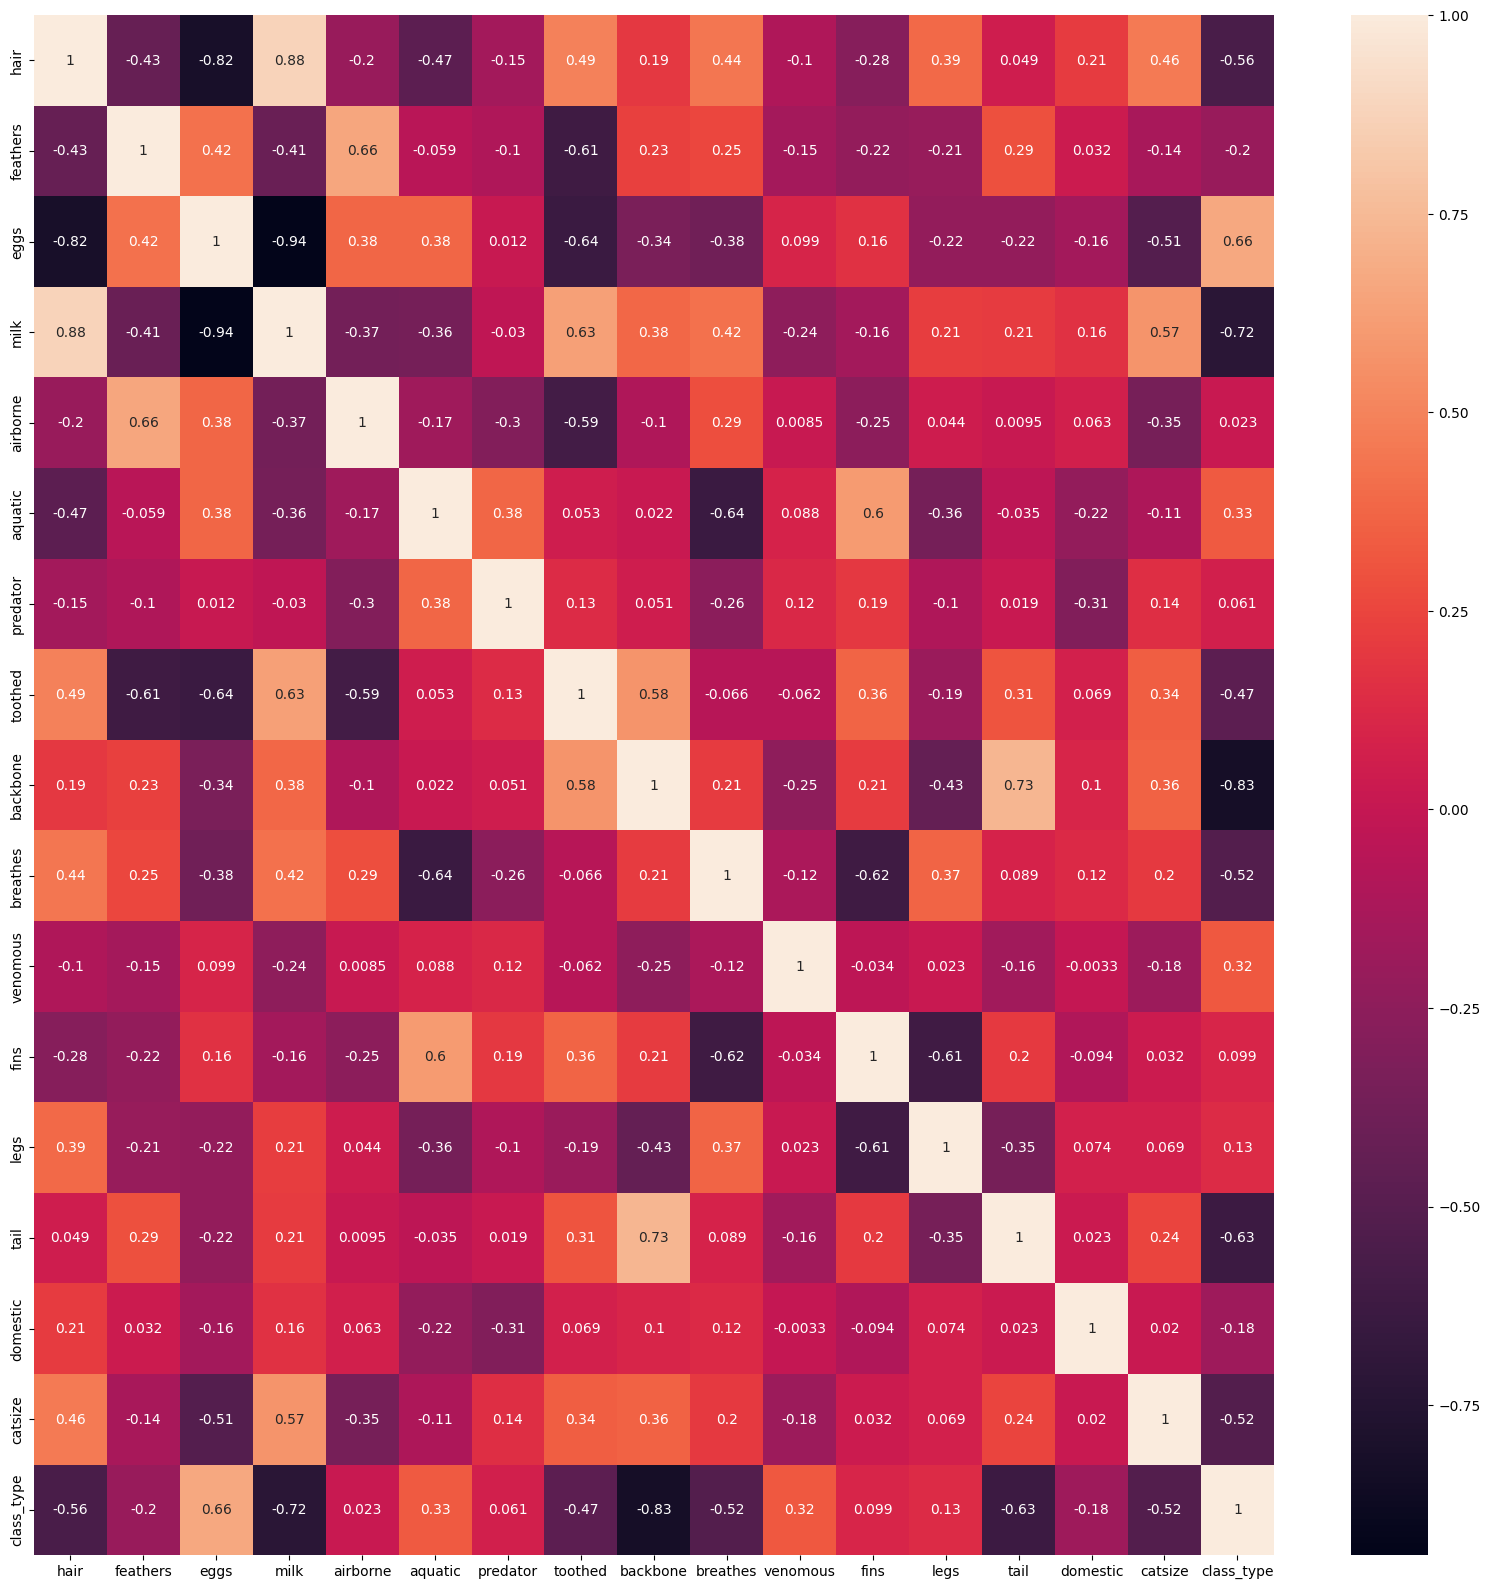

In [70]:
plt.figure(figsize = (20,20))
sns.heatmap(df_zoo.corr(numeric_only = True) , annot = True)
plt.show()

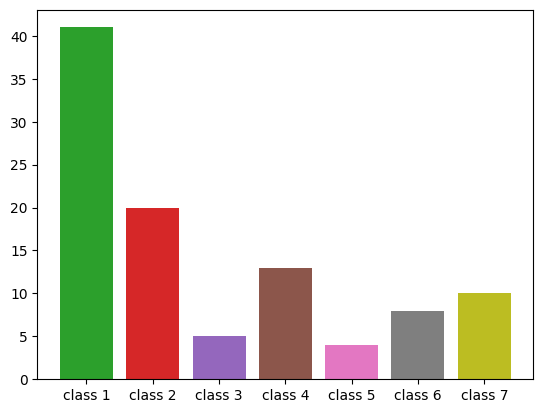

In [71]:
types = df_zoo["class_type"].value_counts()

for i in types:
  plt.bar("class 1" , types[1])
  plt.bar("class 2" , types[2])
  plt.bar("class 3" , types[3])
  plt.bar("class 4" , types[4])
  plt.bar("class 5" , types[5])
  plt.bar("class 6" , types[6])
  plt.bar("class 7" , types[7])

In [72]:
X = df_zoo.drop(columns = "class_type")
Y = df_zoo["class_type"]

In [73]:
X.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["animal_name"] = le.fit_transform(X["animal_name"])

In [75]:
X.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [76]:
import keras
from keras.models import Sequential
model1 = Sequential()

In [77]:
model1.add(keras.layers.Dense(units = 32 , activation = 'relu'))
model1.add(keras.layers.Dense(units = 20 , activation = 'relu'))
model1.add(keras.layers.Dense(units = 8 , activation = 'softmax'))

In [78]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , random_state = 2 , test_size = 0.2)

In [79]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [80]:
model1.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam" ,  metrics = ["accuracy"])

In [81]:
model1.fit(X_train , Y_train , batch_size=35, epochs = 80)

Epoch 1/80
3/3 [==============================] - 1s 5ms/step - loss: 2.0709 - accuracy: 0.2000
Epoch 2/80
3/3 [==============================] - 0s 5ms/step - loss: 1.9861 - accuracy: 0.3250
Epoch 3/80
3/3 [==============================] - 0s 4ms/step - loss: 1.9085 - accuracy: 0.3750
Epoch 4/80
3/3 [==============================] - 0s 4ms/step - loss: 1.8385 - accuracy: 0.4875
Epoch 5/80
3/3 [==============================] - 0s 4ms/step - loss: 1.7681 - accuracy: 0.5500
Epoch 6/80
3/3 [==============================] - 0s 4ms/step - loss: 1.6993 - accuracy: 0.5625
Epoch 7/80
3/3 [==============================] - 0s 5ms/step - loss: 1.6318 - accuracy: 0.6125
Epoch 8/80
3/3 [==============================] - 0s 5ms/step - loss: 1.5661 - accuracy: 0.6500
Epoch 9/80
3/3 [==============================] - 0s 4ms/step - loss: 1.5012 - accuracy: 0.6625
Epoch 10/80
3/3 [==============================] - 0s 4ms/step - loss: 1.4389 - accuracy: 0.6875
Epoch 11/80
3/3 [======================

In [82]:
model1_p = model1.predict(X_test)

1/1 [==============================] - 0s 57ms/step


In [83]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                576       
                                                                 
 dense_4 (Dense)             (None, 20)                660       
                                                                 
 dense_5 (Dense)             (None, 8)                 168       
                                                                 
Total params: 1404 (5.48 KB)
Trainable params: 1404 (5.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


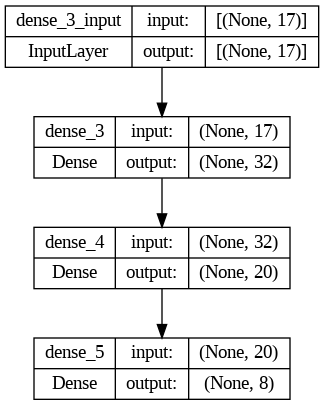

In [84]:
from keras.utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [114]:
#2:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
model2 = LogisticRegression()

model3 = RidgeClassifier()

model4 = DecisionTreeClassifier()


In [115]:
model2.fit(X_train,Y_train)

LogisticRegression()

In [116]:
model2_p = model2.predict(X_test)

In [118]:
model2_score = model2.score(X_test,Y_test)

In [127]:
model2_score

1.0

In [120]:
model3.fit(X_train , Y_train)

RidgeClassifier()

In [125]:
model3_p = model3.predict(X_test)

In [124]:
model4.fit(X_train , Y_train)

DecisionTreeClassifier()

In [126]:
model4_p = model4.predict(X_test)

In [128]:
model4_score = model4.score(X_test,Y_test)

In [129]:
from sklearn.metrics import classification_report
logistic_report = classification_report(Y_test, model2_p)

ridge_report = classification_report(Y_test, model3_p)

tree_report = classification_report(Y_test, model4_p)

In [130]:
print(logistic_report )
print(ridge_report )
print(tree_report )


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.75      1.00      0.86         3

    accuracy                           0.95        21
   macro avg       0.95      0.90      0.90        21
weighted avg       0.96      0.95      0.95        21

              precisio

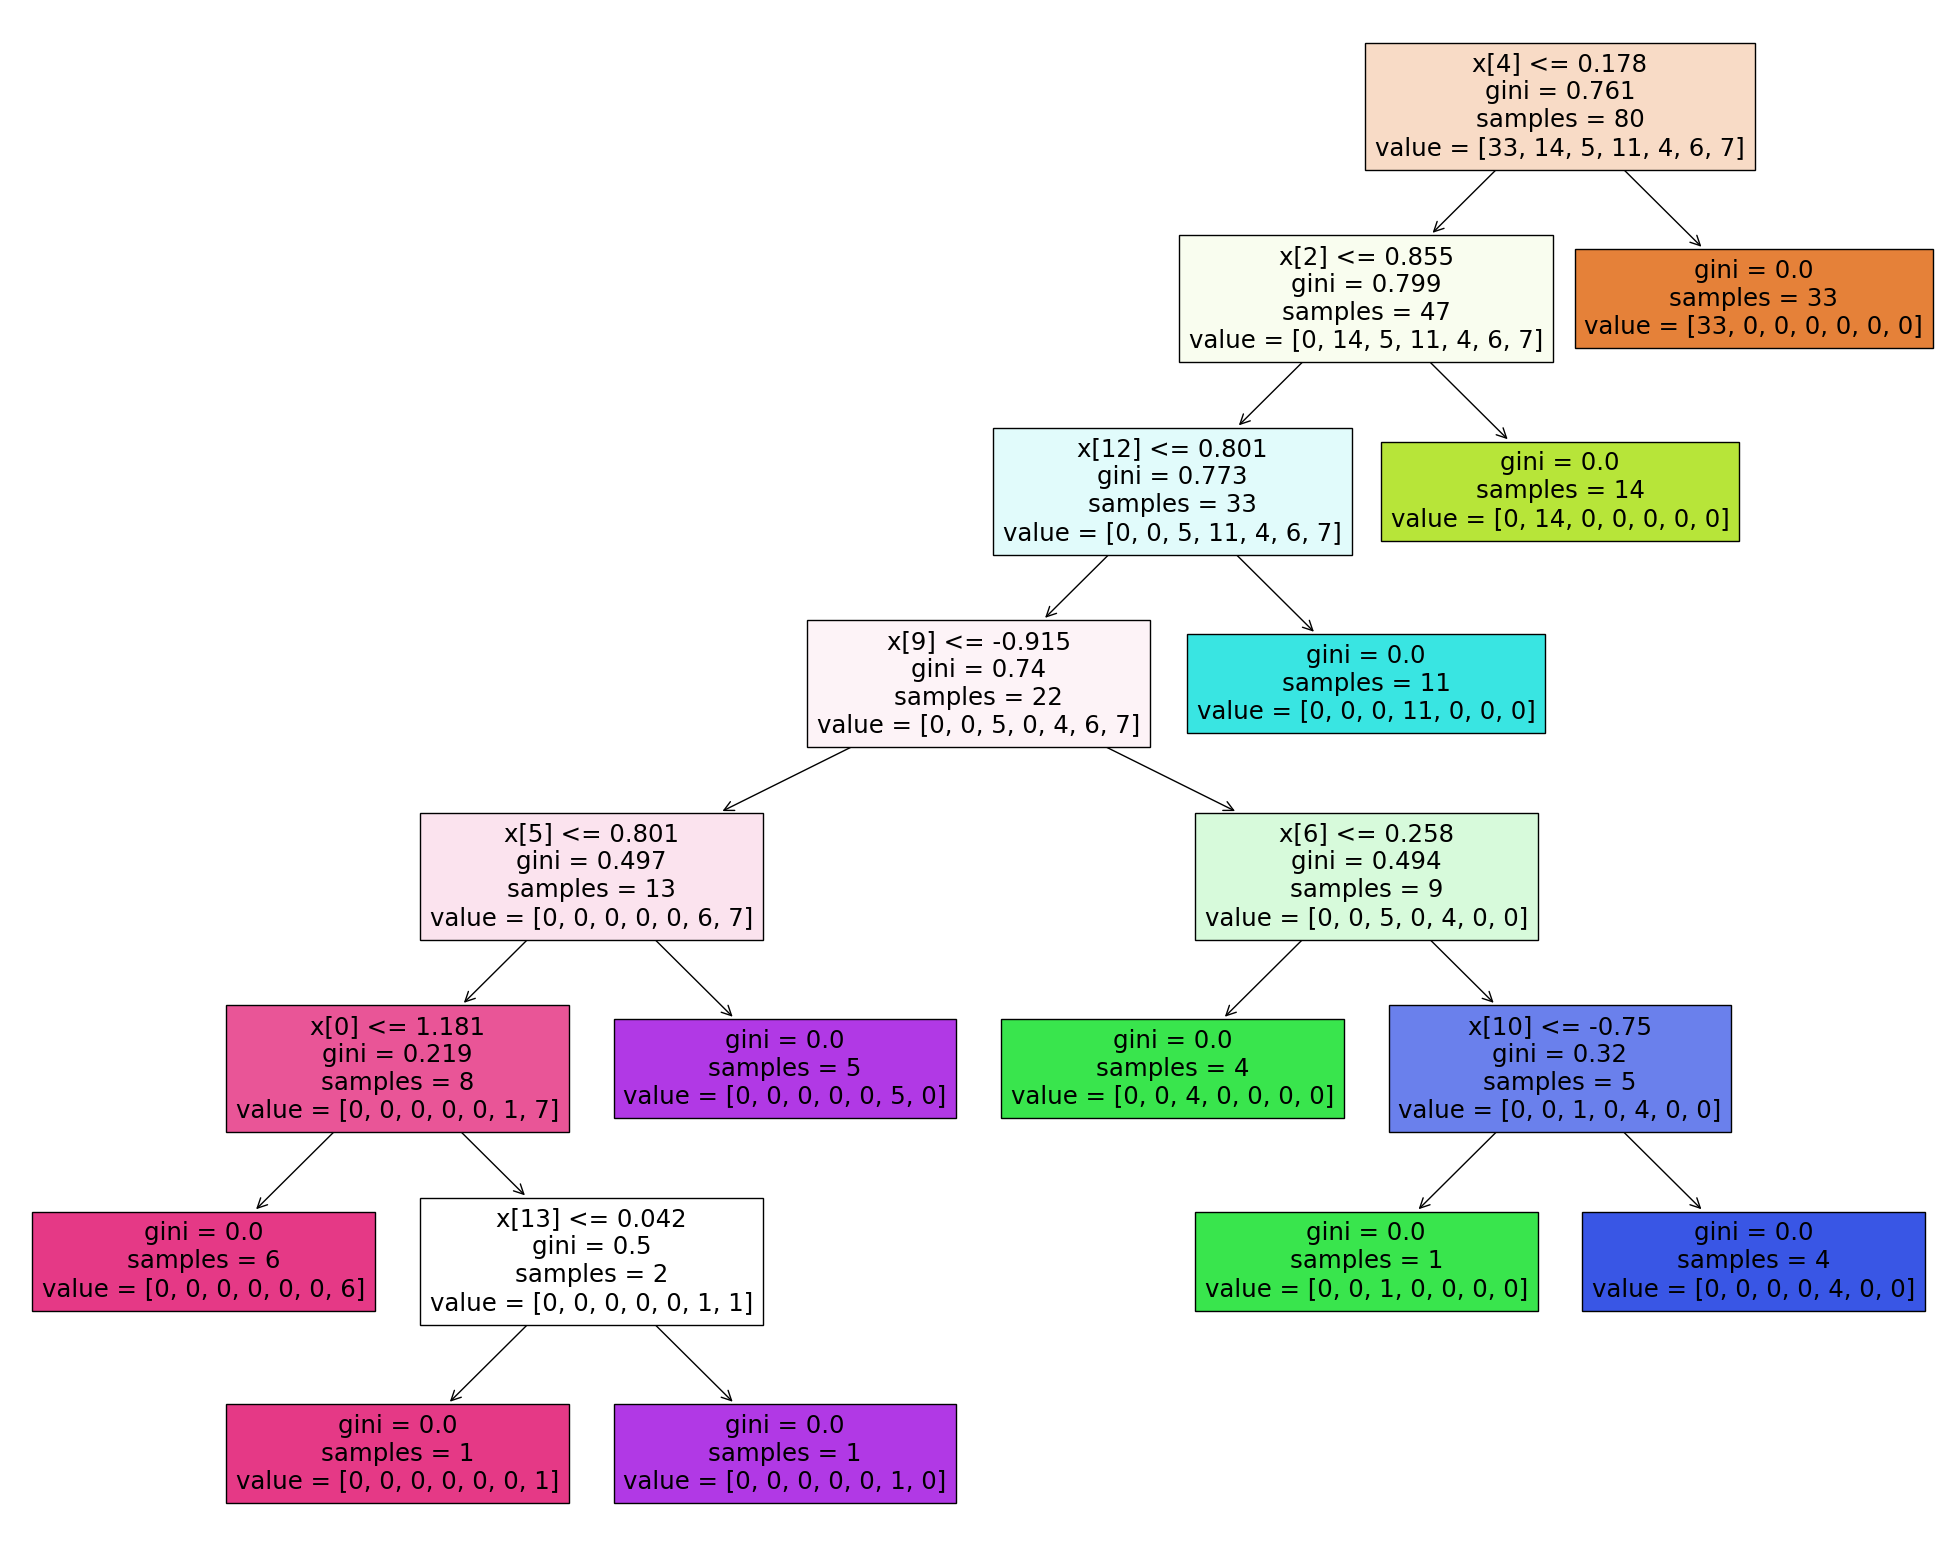

In [140]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(model4, filled = True, rounded = False)

plt.savefig('tree_visualization.png')
